# Property Prediction and Inverse Design

---

## Hands-on demo

---

### Goals:
* Visualize and manipulate data using `pandas`
* Fit and tune models using `sklearn`
* Inverse design using `pyswarm`

### Module imports and global options

In [1]:
import numpy as np
import pandas as pd
import utils  # we define some useful shortcuts here

np.random.seed(0)
pd.options.display.max_rows = 10

# 1. Importing the dataset

We use the `pandas` library built on top of `numpy` for easy import and manipulation of datasets from a variety of formats (excel, csv, etc). Only the simplest functions are used here. Complete documentation is found [here](https://pandas.pydata.org/).

## Dataset

[Concrete Compressive Strength Data Set](<http://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength>)

The input values $X$ are columns 1-8, representing the various compositions of concrete. The target values $y$ are the compressive strengths in the last column, which is a function of the input compositions.

$$ y = f(X) $$

Our goal is to **approximate** this function $f(.)$ by some function $\hat{f}(\cdot,\theta)$, and then learn $\theta$ using data.


### Note

More datasets can be found at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html)


In [2]:
df = pd.read_excel('./data/Concrete_Data.xls', sheet_name='Sheet1')
# df.style.applymap(
#     lambda x: 'color: blue',
#     subset=df.columns[-1])
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1024,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1025,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1026,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1027,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


##  Train-test split

Let us now split the dataset into training and test sets. We use the `train_test_split()` function from `sklearn.model_selection`, where we simply need to specify the ratio of the test set.

In [3]:
from sklearn.model_selection import train_test_split

X, y = df[df.columns[:-1]], df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

# 2. Linear Regression Baseline

We first consider a linear regression baseline, where we fit a linear model

$$ \hat{f}(X,M,c) = X M + c $$ and then minimize the $L^2$ error

$$ \min_{M,c} \frac{1}{2} \Vert y - X M - c \Vert^2 $$

To do this we simply import the function from `sklearn`.

In [4]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_hat_train = regressor.predict(X_train)  # Training set predictions
y_hat_test = regressor.predict(X_test)  # Test set predictions

### Plot predictions

Hereafter, we use simple functions defined in `utils` to do the plots.

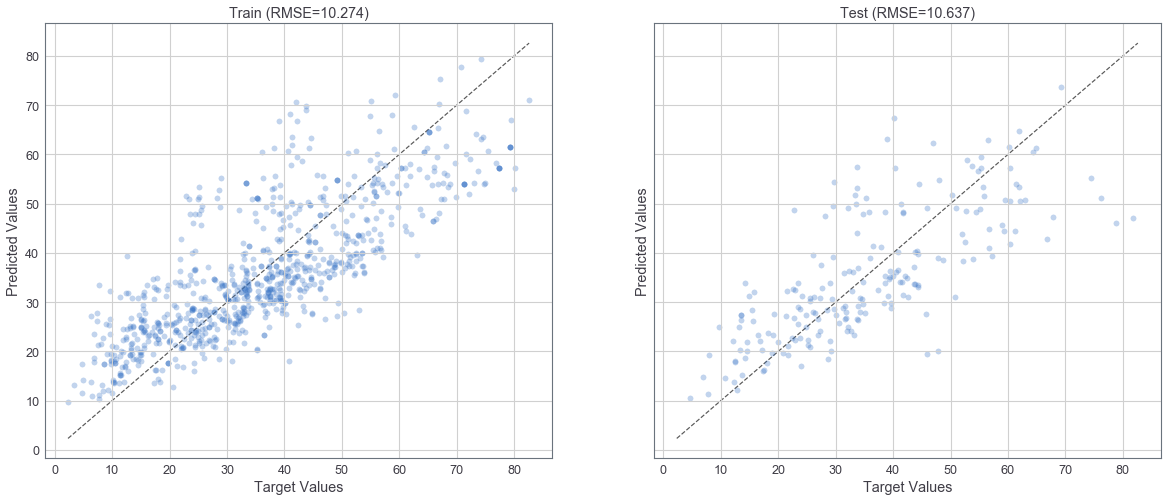

In [5]:
utils.plot_predictions(
    y=[y_train, y_test], y_hat=[y_hat_train, y_hat_test],
    labels=['Train', 'Test']
)

# 2. Gradient Boosting Regression

Let us now use a more robust regressor for non-linear regression. Again, we use canned implementations from `sklearn`.

In [6]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

y_hat_train = regressor.predict(X_train)
y_hat_test = regressor.predict(X_test)

### Plot predictions

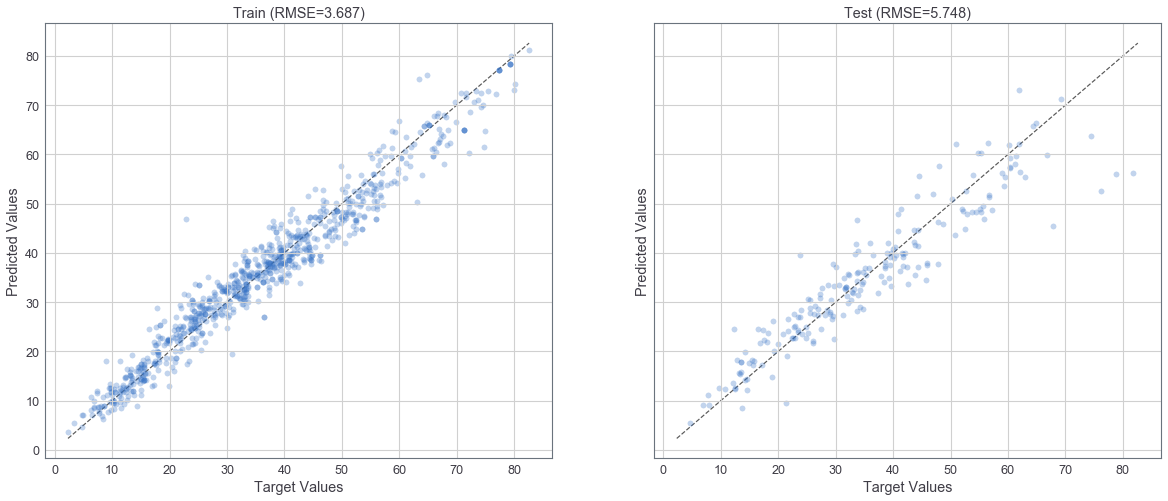

In [7]:
utils.plot_predictions(
    y=[y_train, y_test], y_hat=[y_hat_train, y_hat_test],
    labels=['Train', 'Test']
)

### Feature importance

Decision tree based ensemble models can also tell us how sensitive (in a very loose sense) the output is to each input parameter.

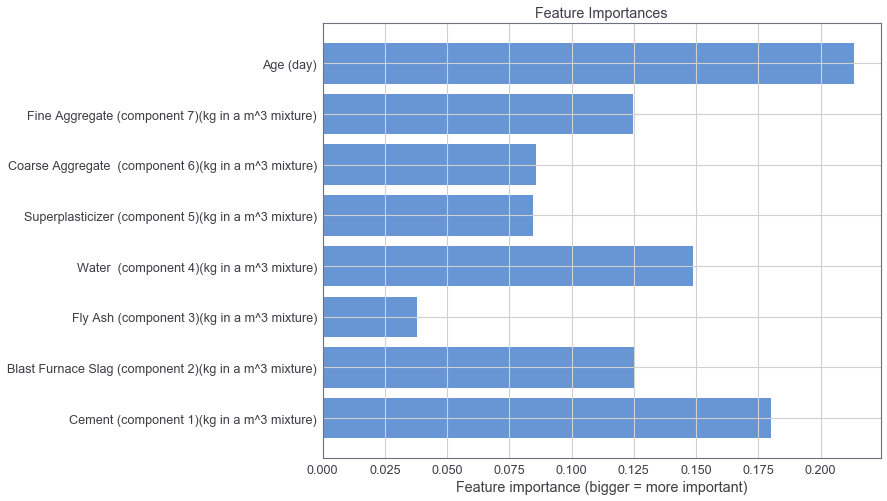

In [8]:
utils.plot_feature_importances(
        importances=regressor.feature_importances_,
        columns=df.columns[:-1])

## 2.1 Overfitting

Here, let us demonstrate overfitting for the gradient boosting regressor. This can be done by drastically increasing the model complexity. One simple way to increase the model complexity is by increasing the `max_depth` parameter in `GradientBoostingRegressor()`

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(max_depth=10)
regressor.fit(X_train, y_train)

y_hat_train = regressor.predict(X_train)
y_hat_test = regressor.predict(X_test)

### Plot predictions

Notice that although the training error has decreased drastically, the test error actually got a little worse. This is a classic case of *over-fitting*.

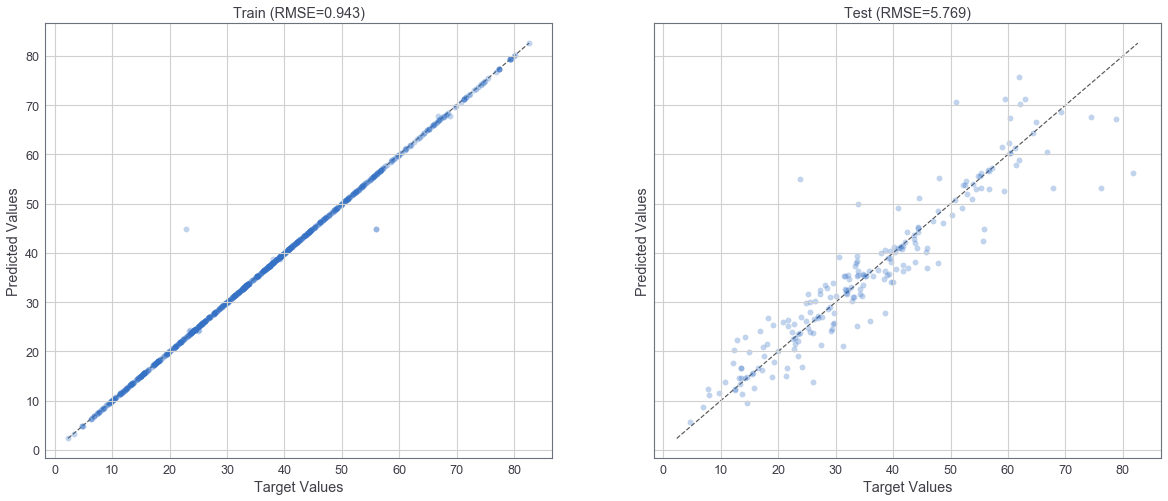

In [10]:
utils.plot_predictions(
    y=[y_train, y_test], y_hat=[y_hat_train, y_hat_test],
    labels=['Train', 'Test']
)

## Hyper-parameter Tuning

Observe that `GradientBoostingRegressor()` performed much better than `LinearRegression()`. Can we improve it further?

Let us take a quick look at the documentation of `GradientBoostingRegressor()`

In [11]:
print(GradientBoostingRegressor.__doc__)

Gradient Boosting for regression.

    GB builds an additive model in a forward stage-wise fashion;
    it allows for the optimization of arbitrary differentiable loss functions.
    In each stage a regression tree is fit on the negative gradient of the
    given loss function.

    Read more in the :ref:`User Guide <gradient_boosting>`.

    Parameters
    ----------
    loss : {'ls', 'lad', 'huber', 'quantile'}, optional (default='ls')
        loss function to be optimized. 'ls' refers to least squares
        regression. 'lad' (least absolute deviation) is a highly robust
        loss function solely based on order information of the input
        variables. 'huber' is a combination of the two. 'quantile'
        allows quantile regression (use `alpha` to specify the quantile).

    learning_rate : float, optional (default=0.1)
        learning rate shrinks the contribution of each tree by `learning_rate`.
        There is a trade-off between learning_rate and n_estimators.

    n_e

## Tuning via Random Search CV

As seen above, there are many parameters one can tune (e.g. learning_rate, n_estimators etc.). We call these *hyper-parameters*, in the sense that they are parameters controlling the properties of the regressor, and are not the *trainable* parameters during model fitting. 

To maximize performance, we have to tune these parameters. To do this, we use *random search cross-validation tuning*. Let us briefly explain each term

1. Cross-validation: This refers to scoring the performance of a model under a set of hyper-parameters given the training set. The idea is to further split the training set into two
    * train set (to be used for training, e.g. 2/3 of original training data)
    * validation set (to be used for evaluation of accuracy, 1/3 of original training data)

By averaging over the 3 possible splits, we can have an average score of this particular selection of hyper-parameters. The goal is maximize this score over the hyper-parameter space. This is called *3-fold* cross-validation.

1. Random search: Instead of performing a grid search over all hyper-parameters, it is usually more efficient to randomly sample them from some distributions and at each CV run, we pick a random hyper-parameter combination.

### Define search space
The `scipy.stats` module allows us to specify probabily distributions.

In [12]:
from scipy import stats 

param_distributions = {
    'n_estimators': stats.randint(low=10, high=1000),
    'max_depth': stats.randint(low=2, high=6),
    'min_samples_split': stats.randint(low=2, high=5),
    'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01]
}

### Fit a CV-tuned regressor

In [13]:
from sklearn.model_selection import RandomizedSearchCV

regressor_cv = RandomizedSearchCV(
    regressor, param_distributions=param_distributions,
    n_iter=50, verbose=1)
regressor_cv.fit(X_train, y_train)

print('Best params: ')
for key, val in regressor_cv.best_params_.iteritems():
    print(key, val)


y_hat_train = regressor_cv.predict(X_train)
y_hat_test = regressor_cv.predict(X_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   28.1s finished


Best params: 
('min_samples_split', 3)
('n_estimators', 767)
('learning_rate', 0.1)
('max_depth', 3)


### Plot predictions and feature importances

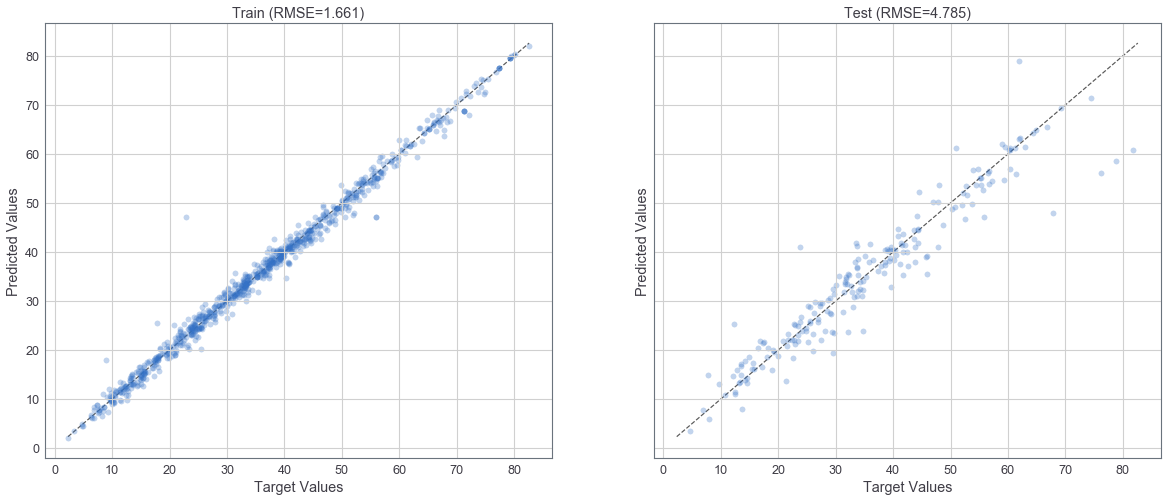

In [14]:
# Plot predictions and feature importances
utils.plot_predictions(
    y=[y_train, y_test],
    y_hat=[y_hat_train, y_hat_test],
    labels=['Train', 'Test']
)

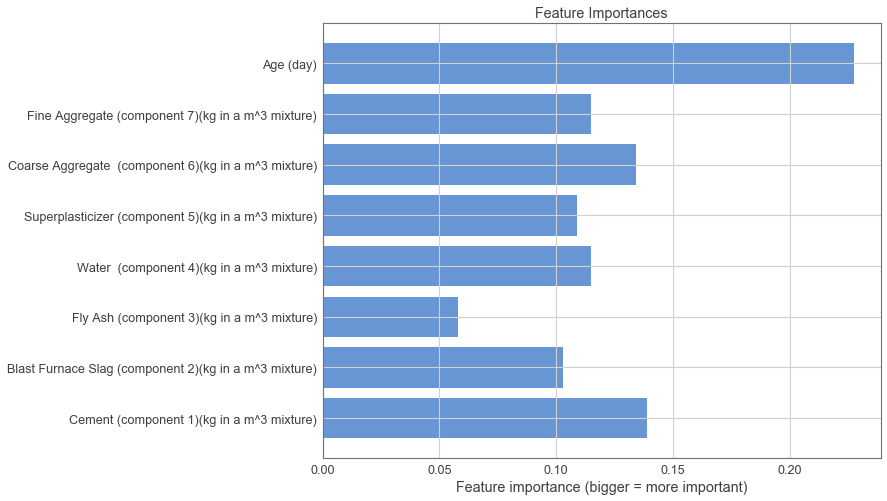

In [15]:
utils.plot_feature_importances(
        importances=regressor_cv.best_estimator_.feature_importances_,
        columns=df.columns[:-1])

# 3. Inverse Design

After fitting our model, we perform inverse design. In this demo, we do this using the `pyswarm` module, which is an implementation of the *particle swarm optimization* method.

### Refit using tuned hyper-parameters

In [16]:
best_params = regressor_cv.best_params_
regressor = GradientBoostingRegressor()
regressor.set_params(**best_params)
regressor.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=767, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

### Bounds, objectives and constraints
Next, we define some bounds, objectives and constraints to be used for inverse design.

1. Upper bounds for all compositions is $1.5\times$ the 75th percentile of the training data.
1. Lower bounds for all compositions is $0.5\times$ the 25th percentile of the training data
1. Objective: minimize *Blast Furnace Slag, Fly Ash, Superplasticizer* compositions
1. Constraints:
    * Compressive strength >= 70 MPa
    * Water <= 150 kg / m^3
    * Age <= 30 days

In [17]:
upper_bounds = np.percentile(X, 75, axis=0) * 1.5
lower_bounds = np.percentile(X, 25, axis=0) * 0.5

def objective(X):
    """
    We want to minimize
        Blast Furnace Slag, Fly Ash, Superplasticizer
    """
    return X[1]**2 + X[2]**2 + X[4]**2

def constraints(X):
    """
    We want to following constraints:
        1. Compressive strength >= 70 MPa
        2. Water <= 150 kg / m^3
        3. Age <= 30 days
    """
    predicted_strength = regressor.predict(X.reshape(1, -1))
    cons_str_lower = predicted_strength - 70
    cons_water_upper = 150 - X[3]
    cons_age_upper = 30 - X[-1]
    return [cons_str_lower, cons_water_upper, cons_age_upper]

### Design via particle swarm optimization

In [18]:
from pyswarm import pso

X_opts = []
n_runs = 5
for n in range(n_runs):
    X_opt, _ = pso(
        objective, lower_bounds, upper_bounds, f_ieqcons=constraints,
        swarmsize=100, maxiter=200)
    X_opts.append(X_opt)
X_opts = np.asarray(X_opts)
y_hat_opts = regressor.predict(X_opts).reshape(-1, 1)
data_opt = np.concatenate([X_opts, y_hat_opts], axis=1)
df_predict = pd.DataFrame(columns=df.columns, data=data_opt)

Stopping search: maximum iterations reached --> 200
Stopping search: maximum iterations reached --> 200
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 200
Stopping search: maximum iterations reached --> 200


## Compare with unseen data

In fact, our dataset used in this demo is not the full dataset. We took out one sample that satisfies the constraints above and minimizes the objective. Let us now check how close our inverse-design results are to this unseen data point (colored red).

In [19]:
df_unseen = pd.read_excel('./data/Concrete_Data_unseen.xls', sheet_name='Sheet1')
df_combined = pd.concat([df_predict, df_unseen], ignore_index=True)
df_combined.style.applymap(lambda x: 'color: red', subset=5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,300.339,1.66277,27.3135,137.286,10.5051,1166.89,777.597,28.4752,70.6691
1,365.166,0,0,149.252,0,1331.33,625.352,21.4892,84.3421
2,420.457,0,1.97258e-05,145.017,0.95,1328.75,880.387,18.4392,70.909
3,414.78,0,0,102.324,3.24542,1152.22,793.564,29.551,70.4711
4,517.901,0,0,146.742,0,1324.73,392.27,21.7592,84.1368
5,485,0,0,146,0,1120,800,28,71.9882
